### 1. newton method

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def f(x):
    return 0.65 - (0.75 / (1 + x**2)) - 0.65 * x * np.arctan(1/x)

In [5]:
def f_prime(x):
    return (1.3*x) / (1 + x**2)**2 - 0.65 * np.arctan(1/x) - 0.65
def f_double_prime(x):
    return (1.3*(1 - 3*x**2)) / (1 + x**2)**3 + 1.3 * (1/x) / (1 + x**2)**2


In [6]:
def newton_method(x_0, tol=1e-6, max_iter=100):
    x = x_0
    for _ in range(max_iter):
        x_new = x - f_prime(x) / f_double_prime(x)
        if np.abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x

In [7]:
x_0 = 1.5


In [8]:
optimal_x = newton_method(x_0)

<ipython-input-5-04d932834a50>:2: RuntimeWarning: overflow encountered in double_scalars
  return (1.3*x) / (1 + x**2)**2 - 0.65 * np.arctan(1/x) - 0.65
<ipython-input-5-04d932834a50>:4: RuntimeWarning: overflow encountered in double_scalars
  return (1.3*(1 - 3*x**2)) / (1 + x**2)**3 + 1.3 * (1/x) / (1 + x**2)**2
<ipython-input-6-88f7f3a5d0d1>:4: RuntimeWarning: divide by zero encountered in double_scalars
  x_new = x - f_prime(x) / f_double_prime(x)
<ipython-input-5-04d932834a50>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (1.3*x) / (1 + x**2)**2 - 0.65 * np.arctan(1/x) - 0.65
<ipython-input-5-04d932834a50>:4: RuntimeWarning: invalid value encountered in double_scalars
  return (1.3*(1 - 3*x**2)) / (1 + x**2)**3 + 1.3 * (1/x) / (1 + x**2)**2


x_values = np.linspace(0, 3, 100)
y_values = f(x_values)

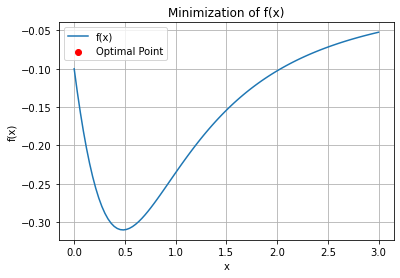

In [10]:
plt.plot(x_values, y_values, label='f(x)')
plt.scatter(optimal_x, f(optimal_x), color='red', label='Optimal Point')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Minimization of f(x)')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
print("Optimal x:", optimal_x)
print("Minimum value of f(x):", f(optimal_x))

Optimal x: nan
Minimum value of f(x): nan


### 2. steepest descent method in multidimensional

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

In [43]:
def steepest_descent(f, grad_f, x0, alpha=0.01, tol=1e-6, max_iter=1000):
    x = x0
    x_history = [x]
    i = 1
    while True:
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        search_direction = -grad
        def f_alpha(alpha): return f(x + alpha * search_direction)
        alpha_opt = minimize_scalar(f_alpha).x
        x = x + alpha_opt * search_direction
        x_history.append(x)
        i += 1
        if i > max_iter:
            break
    return x, f(x), x_history

In [44]:
def f(x):
    return 3 * x[0]**2 + x[1]**2

In [45]:
def grad_f(x):
    return np.array([4 * x[0], 2 * x[1]])

In [46]:
x0 = np.array([1, 2])

In [47]:
x_opt, f_opt, x_history = steepest_descent(f, grad_f, x0)

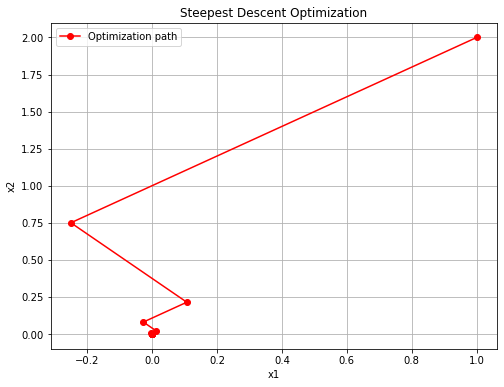

In [48]:
x_history = np.array(x_history)
plt.figure(figsize=(8, 6))
plt.plot(x_history[:, 0], x_history[:, 1], marker='o', color='r', label='Optimization path')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Steepest Descent Optimization')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
print("Optimal solution:", x_opt)
print("Optimal value:", f_opt)

Optimal solution: [1.62084902e-07 3.24169805e-07]
Optimal value: 1.839006089410613e-13
